✅ TensorFlow version: 2.20.0
📂 Loading IMDB dataset from: ./imdb_data.npz
✅ Training data shape: (25000, 200)
✅ Test data shape: (25000, 200)


C:\Users\Siddhant Gite\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.7756 - loss: 0.4639 - val_accuracy: 0.8462 - val_loss: 0.3610
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.8997 - loss: 0.2519 - val_accuracy: 0.8714 - val_loss: 0.3053
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 148s 941ms/step - accuracy: 0.9200 - loss: 0.2086 - val_accuracy: 0.8578 - val_loss: 0.3363
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 143s 913ms/step - accuracy: 0.9463 - loss: 0.1453 - val_accuracy: 0.8624 - val_loss: 0.3676
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 134s 850ms/step - accuracy: 0.9662 - loss: 0.1001 - val_accuracy: 0.8486 - val_loss: 0.4022


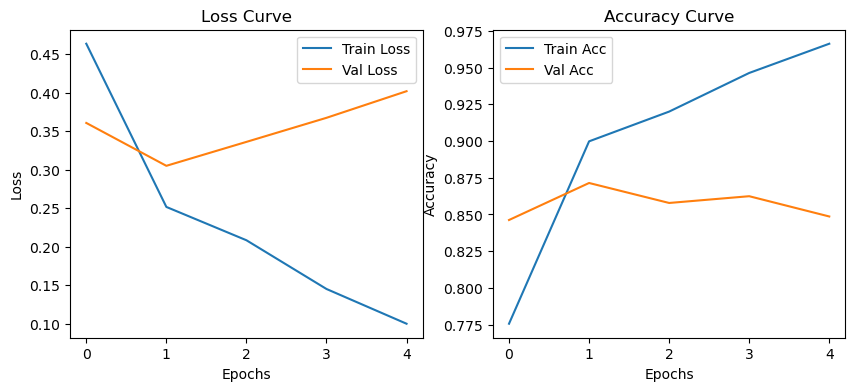

782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.8472 - loss: 0.4077

✅ Test Accuracy: 0.8472
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step

🎯 Sample Predictions:

Review #0
Actual: 0 | Predicted: 0
-----------------------------
Review #1
Actual: 1 | Predicted: 1
-----------------------------
Review #2
Actual: 1 | Predicted: 1
-----------------------------
Review #3
Actual: 0 | Predicted: 1
-----------------------------
Review #4
Actual: 1 | Predicted: 1
-----------------------------

📁 Dataset loaded from: C:\Users\Siddhant Gite\Untitled Folder\imdb_data.npz


C:\Users\Siddhant Gite\AppData\Local\Temp\ipykernel_10476\1779144848.py:98: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual:", y_test[i], "| Predicted:", int(pred[i]))


In [1]:
# ------------------------------------------------------------
# IMDB Sentiment Classification using LSTM (Offline Local Dataset)
# ------------------------------------------------------------

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load IMDB Dataset from Local File
# ------------------------------------------------------------
data_path = "./imdb_data.npz"  # ⚠️ Make sure this file exists in your Jupyter folder

if not os.path.exists(data_path):
    raise FileNotFoundError(f"❌ Dataset not found at {data_path}. Please ensure imdb_data.npz exists locally.")

print(f"📂 Loading IMDB dataset from: {data_path}")
data = np.load(data_path, allow_pickle=True)

X_train, y_train = data["X_train"], data["y_train"]
X_test, y_test = data["X_test"], data["y_test"]

num_words = 10000
maxlen = 200

# ------------------------------------------------------------
# Step 2: Pad Sequences (Preprocessing)
# ------------------------------------------------------------
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

print(f"✅ Training data shape: {X_train.shape}")
print(f"✅ Test data shape: {X_test.shape}")

# ------------------------------------------------------------
# Step 3: Build LSTM Model
# ------------------------------------------------------------
model = keras.Sequential([
    layers.Embedding(num_words, 128, input_length=maxlen),
    layers.LSTM(128),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ------------------------------------------------------------
# Step 4: Train the Model
# ------------------------------------------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=128,
    verbose=1
)

# ------------------------------------------------------------
# Step 5: Plot Accuracy and Loss
# ------------------------------------------------------------
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Curve")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()

plt.show()

# ------------------------------------------------------------
# Step 6: Evaluate Model
# ------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# ------------------------------------------------------------
# Step 7: Predict on Sample Reviews
# ------------------------------------------------------------
pred = (model.predict(X_test[:5]) > 0.5).astype(int)

print("\n🎯 Sample Predictions:\n")
for i in range(5):
    print(f"Review #{i}")
    print("Actual:", y_test[i], "| Predicted:", int(pred[i]))
    print("-----------------------------")

print(f"\n📁 Dataset loaded from: {os.path.abspath(data_path)}")
